In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Ravel Black/White

## Refseq OTU

In [2]:
task = 'Ravel Black/White Refseq OTU'
folder = 'ravel-black-whitev2'

In [3]:
num_features = 588
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/ravel_black_white_refseq_exp1/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/ravel_black_white_refseq_exp2/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/ravel_black_white_refseq_exp3/best_test.csv', sep=';') # NoRel+CLR

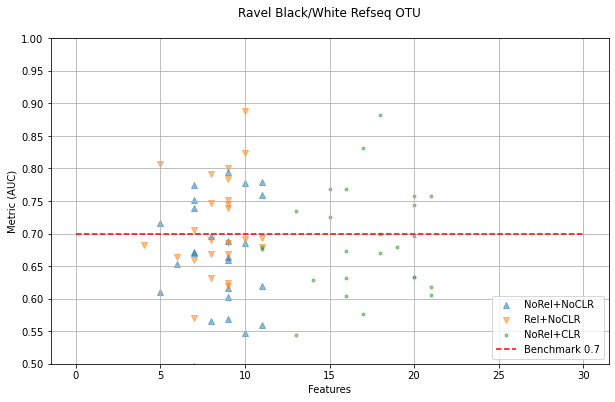

In [5]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.70, filename='./plotsv2/ravel_black_white_refseq_otu.png', xmax=30, ylim=(0.5, 1.001))

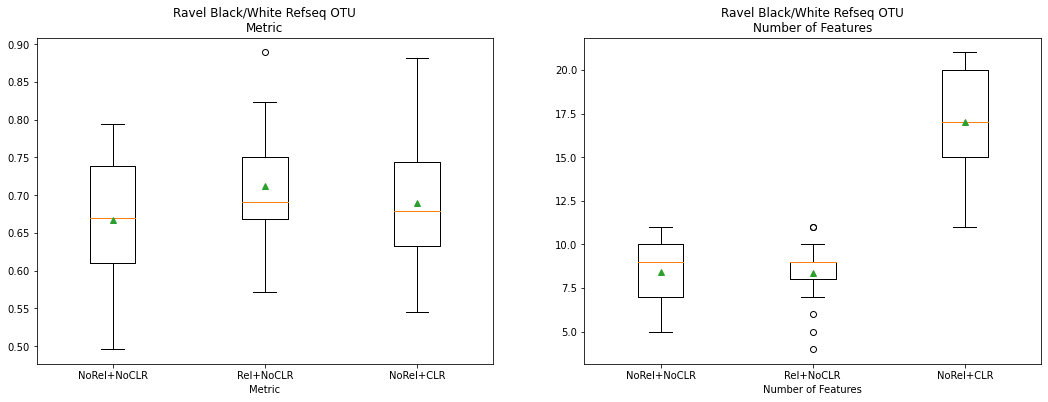

In [6]:
utils.boxplot(df1, df2, df3, num_features, weights, task, filename='./plotsv2/ravel_black_white_boxplot_refseq_otu.png')

In [7]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [32]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [33]:
n = 100

In [34]:
# Experiment 1

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 588)


In [35]:
# Experiment 2

config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 588)


In [36]:
# Experiment 3

config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (200, 588)


In [37]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
34,20,11,0.759,0.740,"[60, 157, 168, 169, 211, 311, 326, 366, 385, 4...",0.740,0.740,"[0.799, 0.825, 0.732, 0.62, 0.769, 0.752, 0.84...",0.754,0.594,0.877,0.066
23,13,9,0.794,0.779,"[60, 119, 157, 211, 227, 311, 391, 426, 534]",0.779,0.779,"[0.74, 0.695, 0.774, 0.712, 0.827, 0.783, 0.60...",0.750,0.554,0.909,0.070
20,11,9,0.689,0.674,"[60, 156, 157, 158, 311, 391, 396, 470, 490]",0.674,0.674,"[0.856, 0.689, 0.799, 0.682, 0.732, 0.74, 0.74...",0.744,0.586,0.912,0.072
33,19,11,0.779,0.760,"[60, 98, 119, 130, 157, 205, 227, 311, 366, 36...",0.760,0.760,"[0.855, 0.745, 0.736, 0.69, 0.716, 0.77, 0.759...",0.739,0.566,0.909,0.062
22,12,9,0.603,0.588,"[2, 72, 161, 211, 227, 260, 311, 358, 407]",0.588,0.588,"[0.859, 0.732, 0.651, 0.728, 0.82, 0.754, 0.70...",0.728,0.564,0.859,0.068


In [38]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
19,9,8,0.792,0.778,"[2, 84, 156, 211, 311, 379, 407, 490]",0.778,0.778,"[0.769, 0.756, 0.731, 0.91, 0.749, 0.747, 0.75...",0.753,0.523,0.910,0.072
21,10,7,0.705,0.693,"[2, 60, 72, 84, 157, 311, 457]",0.693,0.693,"[0.558, 0.657, 0.813, 0.65, 0.68, 0.719, 0.711...",0.752,0.504,0.912,0.075
42,22,6,0.664,0.654,"[60, 156, 157, 311, 457, 488]",0.654,0.654,"[0.626, 0.719, 0.727, 0.752, 0.811, 0.764, 0.7...",0.752,0.599,0.902,0.067
36,20,9,0.751,0.736,"[74, 82, 84, 269, 277, 311, 379, 431, 490]",0.736,0.736,"[0.774, 0.776, 0.668, 0.826, 0.712, 0.779, 0.8...",0.747,0.538,0.897,0.064
32,16,8,0.747,0.733,"[59, 60, 98, 157, 311, 410, 445, 457]",0.733,0.733,"[0.714, 0.615, 0.694, 0.836, 0.697, 0.79, 0.83...",0.744,0.575,0.879,0.065


In [39]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
12,9,11,0.676,0.657,"[17, 26, 60, 157, 160, 168, 307, 311, 364, 392...",0.657,0.657,"[0.832, 0.737, 0.68, 0.719, 0.624, 0.662, 0.76...",0.741,0.490,0.895,0.071
5,3,18,0.670,0.639,"[2, 5, 17, 59, 60, 84, 86, 98, 129, 159, 211, ...",0.639,0.639,"[0.704, 0.754, 0.71, 0.692, 0.685, 0.682, 0.75...",0.712,0.487,0.910,0.066
20,13,11,0.679,0.660,"[60, 62, 115, 128, 162, 192, 231, 238, 311, 47...",0.660,0.660,"[0.586, 0.751, 0.702, 0.642, 0.706, 0.531, 0.6...",0.709,0.531,0.861,0.070
23,15,19,0.680,0.648,"[4, 29, 59, 60, 64, 157, 160, 161, 176, 247, 3...",0.648,0.648,"[0.764, 0.66, 0.634, 0.766, 0.715, 0.722, 0.68...",0.703,0.548,0.838,0.069
0,0,13,0.545,0.523,"[8, 22, 105, 106, 157, 160, 210, 211, 231, 277...",0.523,0.523,"[0.624, 0.765, 0.828, 0.679, 0.7, 0.611, 0.787...",0.695,0.489,0.848,0.079


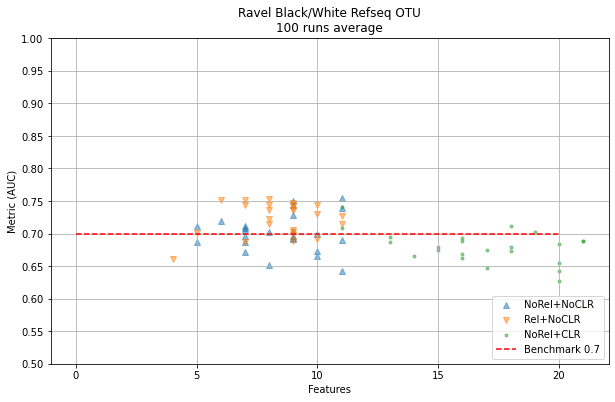

In [40]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.70, filename='./plotsv2/ravel_black_white_refseq_otu_avg_n.png', xmax=20, ylim=(0.5, 1.001))

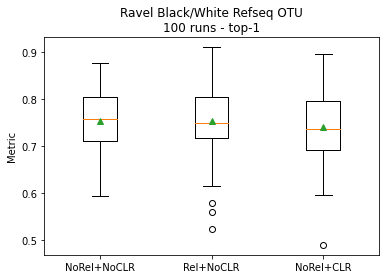

In [41]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plotsv2/ravel_black_white_boxplot_nruns_top1_refseq_otu.png')

---

In [58]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [59]:
folder = 'ravel-black-whitev2'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

best_n_features = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [60]:
config.DATA_PARAMS['task'] = vaginal['ravel_white_black_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    score, fi = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    score, fi = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['Rel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = vaginal['ravel_white_black_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    score, fi = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+CLR'].append(len(top_n_features))

Final dataset shape: (200, 588)
Final dataset shape: (200, 588)
Final dataset shape: (200, 588)


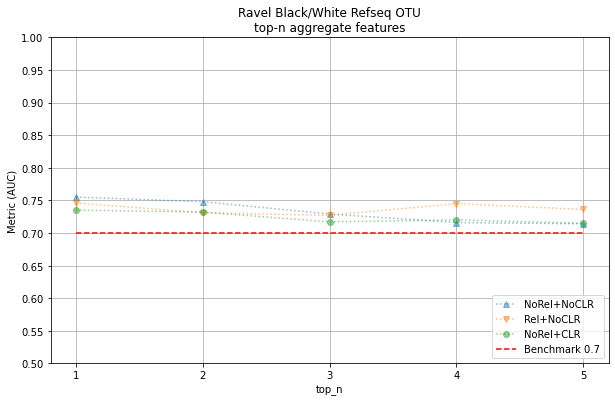

In [61]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.70, filename='./plotsv2/ravel_black_white_nruns_topn_refseq_otu.png', xmax=(top_n-1), ylim=(0.5, 1.0001), top_n=top_n)

In [62]:
print(best_n)
print(best_n_features)

{'NoRel+NoCLR': [0.755, 0.748, 0.729, 0.716, 0.714], 'Rel+NoCLR': [0.746, 0.731, 0.727, 0.745, 0.736], 'NoRel+CLR': [0.735, 0.732, 0.717, 0.72, 0.715]}
{'NoRel+NoCLR': [11, 16, 21, 25, 31], 'Rel+NoCLR': [8, 12, 13, 18, 22], 'NoRel+CLR': [11, 25, 33, 47, 55]}


---

In [63]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [77]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
score, fi = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0531       NR_113091.1_Porphyromonas_uenonis_strain_JCM_13868_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0891       NR_041938.1_Peptoniphilus_lacrimalis_strain_CCUG_31350_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0975       NR_026370.1_Corynebacterium_lipophiloflavum_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1215       NR_113093.1_Prevotella_amnii_strain_JCM_14753_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1288       NR_041796.1_Lactobacillus_vaginalis_strain_ATCC_49540_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1461       NR_113029.1_Anaerococcus_hydrogenalis_strain_JCM_7635_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1495       NR_113638.1_Lactobacillus_acidophilus_strain_NBRC_13951_16S_ribosomal_RNA_gene__partial_sequence
          -            0.2143       NR_117757.1_Atopobiu

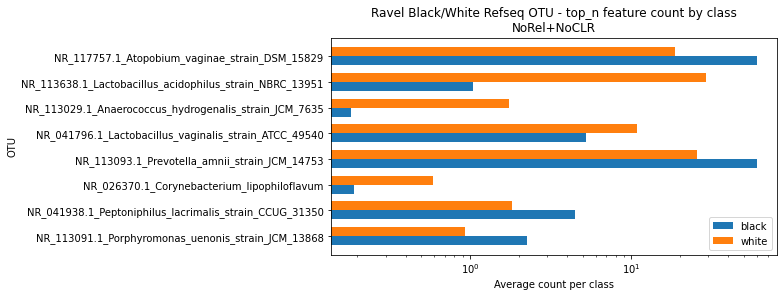

In [78]:
features = data1.features[top_n_features]
filename = f'./plotsv2/ravel_white_black_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data1, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,4), filename=filename, clean_otu=True)

In [71]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0817       NR_115509.1_Peptoniphilus_indolicus_strain_GIFU_7848_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0884       NR_041722.1_Streptococcus_anginosus_strain_SK52_16S_ribosomal_RNA_gene__complete_sequence
          -            0.0936       NR_026213.1_Corynebacterium_xerosis_strain_ATCC_373_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0999       NR_113093.1_Prevotella_amnii_strain_JCM_14753_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1299       NR_117072.1_Lactobacillus_jensenii_strain_Gasser_62G_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1319       NR_027532.1_Ureaplasma_parvum_serovar_3_strain_ATCC_27815_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1636       NR_118377.1_Gardnerella_vaginalis_strain_ATCC_14018_16S_ribosomal_RNA_gene__partial_sequence
          -            0.211        NR_113029.1_Anaer

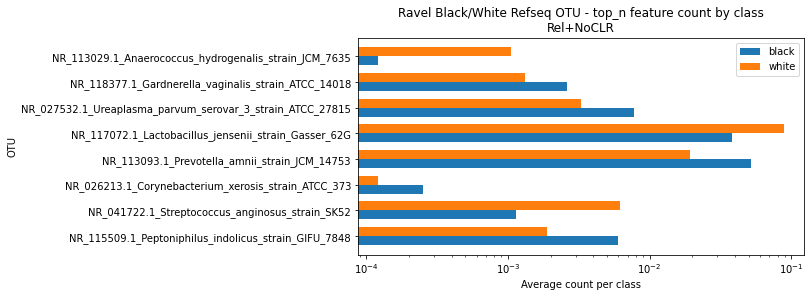

In [72]:
features = data2.features[top_n_features]
filename = f'./plotsv2/ravel_white_black_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data2, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,4), filename=filename, clean_otu=True)

In [73]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.042        NR_113393.1_Peptococcus_niger_strain_JCM_6506_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0917       NR_118323.1_Anaerococcus_obesiensis_strain_ph10_16S_ribosomal_RNA__partial_sequence
          -            0.1032       NR_025361.1_Arthrobacter_albus_strain_CF-43_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1048       NR_041938.1_Peptoniphilus_lacrimalis_strain_CCUG_31350_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1128       NR_043231.1_Dialister_propionicifaciens_strain_ADV_1053.03_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1299       NR_113029.1_Anaerococcus_hydrogenalis_strain_JCM_7635_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1422       NR_026370.1_Corynebacterium_lipophiloflavum_16S_ribosomal_RNA_gene__partial_sequence
          -            0.2733       NR_041796.1_Lactobacillus_vaginalis

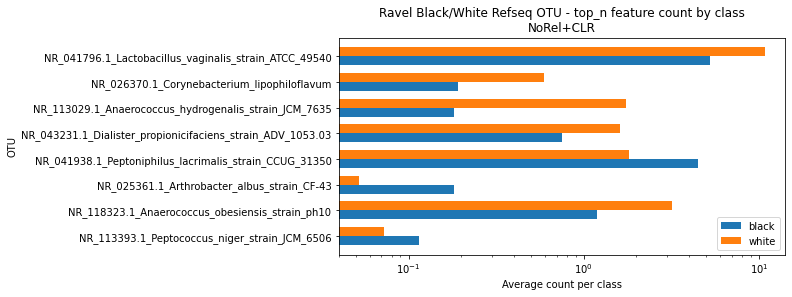

In [74]:
features = data3.features[top_n_features]
filename = f'./plotsv2/ravel_white_black_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data3, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('black', 'white'), figsize=(8,4), filename=filename, clean_otu=True)